Plot the results of [gpx_heatmap](../julia/gpx_heatmap.ipynb) using Basemap.

In [60]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import netCDF4
import filament
import logging
import GPX_functions
from mpl_toolkits.basemap import Basemap
plt.style.use('dark_background')
plt.rcParams['axes.facecolor']='0.2'

In [47]:
outputdir = "../netCDF/"
year = 2020
#year = "All"
#region = "Mallorca"
region = "GranCanaria"
gpxdir = "/data/GPX/{}/{}/".format(region, year)
print(os.path.exists(gpxdir))
outputfile1 = os.path.join(outputdir, "{}{}_heat1.nc".format("GC", year))
outputfile2 = os.path.join(outputdir, "{}{}_heat2.nc".format("GC", year))
outputfile3 = os.path.join(outputdir, "{}{}_heat3.nc".format("GC", year))
fname1 = "{}_{}_1".format(region, year)
fname2 = "{}_{}_2".format(region, year)
fname3 = "{}_{}_3".format(region, year)

print(os.path.exists(outputfile1) & os.path.exists(outputfile2) & os.path.exists(outputfile3))
                           
figdir = "../images/"
visfile = "/data/Visible/Sentinel-2_L1C_2019-09-13.tiff"
vis = filament.Visible()
vis.read_geotiff(visfile)

True
True


### Data points

In [32]:
filelist = sorted(glob.glob(os.path.join(gpxdir, "*/*.gpx")))

londata, latdata, e = [], [], []
for gpxfile in filelist:
    lon0, lat0, e0 = GPX_functions.read_gpx_regex(gpxfile)
    londata.extend(lon0)
    latdata.extend(lat0)
len(filelist)

160

### Heatmaps from netCDF

In [86]:
with netCDF4.Dataset(outputfile1, "r") as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    heat1 = nc.variables["heat"][:]
with netCDF4.Dataset(outputfile2, "r") as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    heat2 = nc.variables["heat"][:]
with netCDF4.Dataset(outputfile3, "r") as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    heat3 = nc.variables["heat"][:]

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


In [44]:
# Gran Canaria
m = Basemap(epsg=4326, llcrnrlon=-15.85, llcrnrlat=27.7,
                urcrnrlon=-15.35, urcrnrlat=28.2,
                lat_ts=28., resolution='f')

In [18]:
# Mallorca
m = Basemap(epsg=4326, llcrnrlon=2.28, llcrnrlat=39.25,
                urcrnrlon=3.5, urcrnrlat=39.97,
                lat_ts=28., resolution='f')

In [5]:
mc = Basemap(projection='merc',llcrnrlat=28.038, urcrnrlat=28.039,
            llcrnrlon=-15.5725, urcrnrlon=-15.5705, lat_ts=28., resolution='c')

## Data

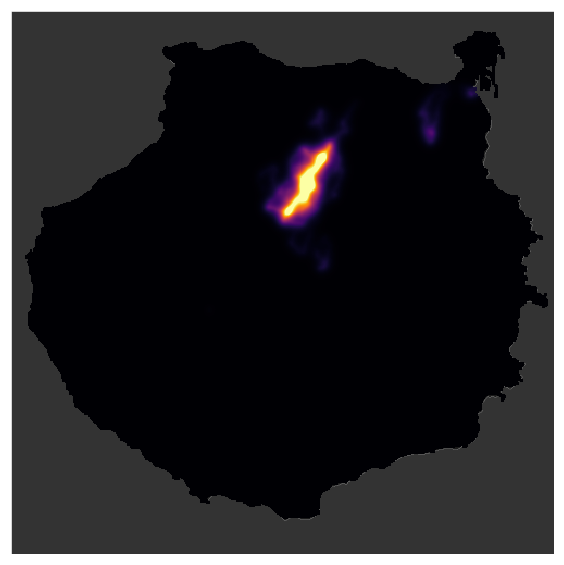

In [87]:
fig = plt.figure(figsize=(10, 10), facecolor='white')
m.pcolormesh(lon, lat, heat3, latlon=True, cmap=plt.cm.inferno, 
             vmax=500., zorder=4)
m.drawcoastlines(linewidth=.2, color="w", zorder=3)
m.fillcontinents(color=".1", zorder=2)
#m.plot(londata, latdata, "wo", markersize=0.01, latlon=True, alpha=0.8)
#plt.savefig(os.path.join(figdir, fname2), dpi=300, bbox_inches="tight")
plt.show()
plt.close()